In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os

cwd = os.getcwd()
parent_dir = os.path.abspath(os.path.join(cwd, '..'))
sys.path.append(parent_dir)

import c2qa
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.circuit.library import RGate
from qiskit.converters import circuit_to_gate
from qutip import *
from qiskit.circuit import Parameter
from qiskit.circuit.library import UnitaryGate
from custom_gates import shors,state_generation,state_transfer
from qiskit.visualization import plot_histogram
from scipy.stats.contingency import margins
from qiskit.quantum_info import partial_trace

## Basic States

In [2]:
cutoff = 2**6
qmr1 = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_qumode=int(np.ceil(np.log2(cutoff))),name = 'qumode')
qbr = QuantumRegister(1)
cr = ClassicalRegister(1)

circuit = c2qa.CVCircuit(qmr1, qbr, cr)
circuit.cv_initialize(0, qmr1[0])

state, result, _ = c2qa.util.simulate(circuit,shots = 1024)

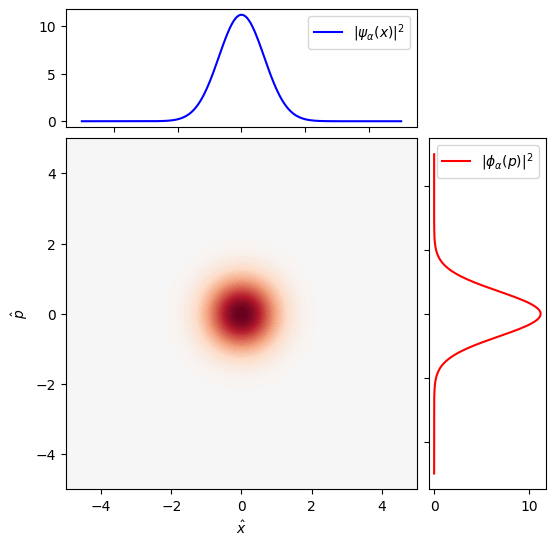

In [3]:
#This cell is mostly plotting
w = c2qa.wigner.wigner(state, axes_max= 5, axes_min= -5, axes_steps = 200)
x_dist, y_dist = margins(w.T)

fig = plt.figure(figsize=(6,6))
gs = fig.add_gridspec(2, 2,  width_ratios=(3, 1), height_ratios=(1, 3),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1,0])
ax_x = fig.add_subplot(gs[0,0])
ax_y = fig.add_subplot(gs[1,1])

absmax = max(np.max(w), np.abs(np.min(w)))
color_levels = np.linspace(-absmax, absmax, 100)

#Plot the wigner function of the vaccum state in the main panel with a colormap
xaxis = np.linspace(-5, 5, 200)
yaxis = np.linspace(-5, 5, 200)
cont = ax.contourf(xaxis, yaxis, w, color_levels, cmap = "RdBu_r")

#plot the distributions against the (normalized) marginals of the wigner function
ax_x.plot(xaxis, x_dist,  label = r"$|\psi_\alpha(x)|^2$", c= "b")

ax_y.plot(y_dist.T, yaxis, label = r"$|\phi_\alpha(p)|^2$", c = "r")

ax.set(xlabel=r"$\hat x$", ylabel=r"$\hat p$")
ax_x.legend()
ax_y.legend()
ax_x.set_xticklabels([]);
ax_y.set_yticklabels([]);

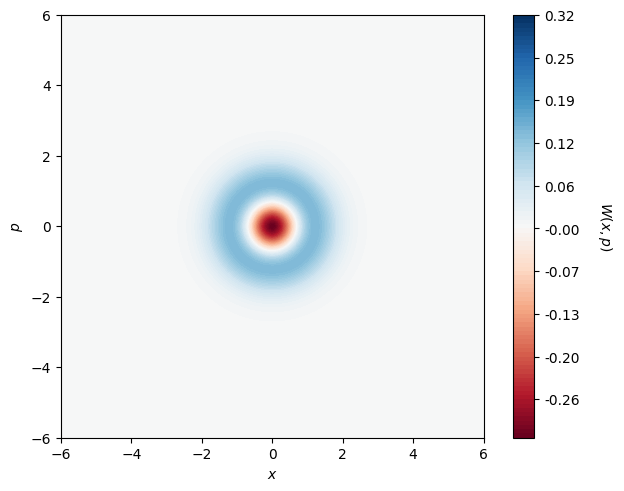

In [16]:
cutoff = 2**6
qmr1 = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_qumode=int(np.ceil(np.log2(cutoff))),name = 'qumode')
qbr = QuantumRegister(1)
cr = ClassicalRegister(1)

circuit = c2qa.CVCircuit(qmr1, qbr, cr)
circuit.cv_initialize(1, qmr1[0])

state, result, _ = c2qa.util.simulate(circuit,shots = 1024)
c2qa.wigner.plot_wigner(circuit, state)

In [5]:
cutoff = 2**6
qmr1 = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_qumode=int(np.ceil(np.log2(cutoff))),name = 'qumode')
qbr = QuantumRegister(1)
cr = ClassicalRegister(1)

circuit = c2qa.CVCircuit(qmr1, qbr, cr)
circuit.cv_initialize(0, qmr1[0])

circuit.cv_d(2/np.sqrt(2),qmr1[0])

state, result, _ = c2qa.util.simulate(circuit,shots = 1024)

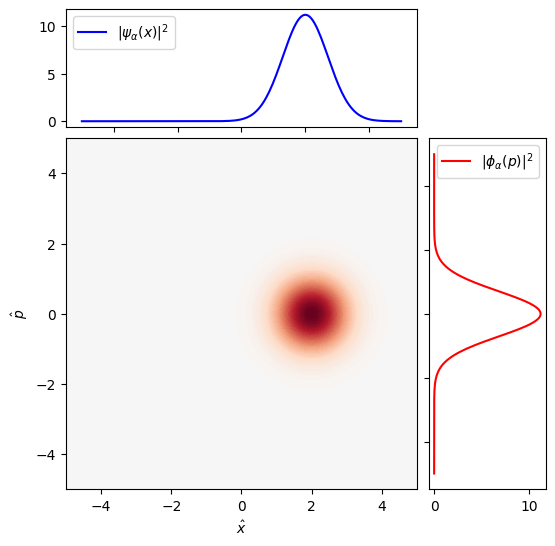

In [6]:
#This cell is mostly plotting
w = c2qa.wigner.wigner(state, axes_max= 5, axes_min= -5, axes_steps = 200)
x_dist, y_dist = margins(w.T)

fig = plt.figure(figsize=(6,6))
gs = fig.add_gridspec(2, 2,  width_ratios=(3, 1), height_ratios=(1, 3),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1,0])
ax_x = fig.add_subplot(gs[0,0])
ax_y = fig.add_subplot(gs[1,1])

absmax = max(np.max(w), np.abs(np.min(w)))
color_levels = np.linspace(-absmax, absmax, 100)

#Plot the wigner function of the coherent state in the main panel with a colormap
xaxis = np.linspace(-5, 5, 200)
yaxis = np.linspace(-5, 5, 200)
cont = ax.contourf(xaxis, yaxis, w, color_levels, cmap = "RdBu_r")

#plot the distributions against the (normalized) marginals of the wigner function
ax_x.plot(xaxis, x_dist,  label = r"$|\psi_\alpha(x)|^2$", c= "b")

ax_y.plot(y_dist.T, yaxis, label = r"$|\phi_\alpha(p)|^2$", c = "r")

ax.set(xlabel=r"$\hat x$", ylabel=r"$\hat p$")
ax_x.legend()
ax_y.legend()
ax_x.set_xticklabels([]);
ax_y.set_yticklabels([]);

In [7]:
cutoff = 2**6
qmr1 = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_qumode=int(np.ceil(np.log2(cutoff))),name = 'qumode')
qbr = QuantumRegister(1)
cr = ClassicalRegister(1)

circuit = c2qa.CVCircuit(qmr1, qbr, cr)
circuit.cv_initialize(0, qmr1[0])

circuit.cv_sq(-1.0,qmr1[0])

state, result, _ = c2qa.util.simulate(circuit,shots = 1024)

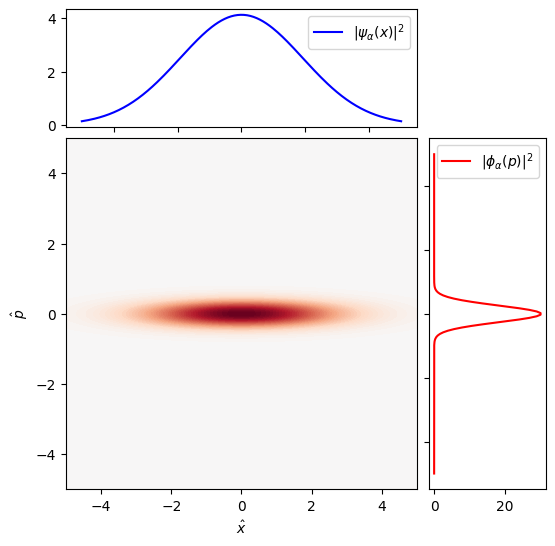

In [8]:
#This cell is mostly plotting
w = c2qa.wigner.wigner(state, axes_max= 5, axes_min= -5, axes_steps = 200)
x_dist, y_dist = margins(w.T)

fig = plt.figure(figsize=(6,6))
gs = fig.add_gridspec(2, 2,  width_ratios=(3, 1), height_ratios=(1, 3),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1,0])
ax_x = fig.add_subplot(gs[0,0])
ax_y = fig.add_subplot(gs[1,1])

absmax = max(np.max(w), np.abs(np.min(w)))
color_levels = np.linspace(-absmax, absmax, 100)

#Plot the wigner function of the squeezed state in the main panel with a colormap
xaxis = np.linspace(-5, 5, 200)
yaxis = np.linspace(-5, 5, 200)
cont = ax.contourf(xaxis, yaxis, w, color_levels, cmap = "RdBu_r")

#plot the distributions against the (normalized) marginals of the wigner function
ax_x.plot(xaxis, x_dist,  label = r"$|\psi_\alpha(x)|^2$", c= "b")

ax_y.plot(y_dist.T, yaxis, label = r"$|\phi_\alpha(p)|^2$", c = "r")

ax.set(xlabel=r"$\hat x$", ylabel=r"$\hat p$")
ax_x.legend()
ax_y.legend()
ax_x.set_xticklabels([]);
ax_y.set_yticklabels([]);

## State Transfer

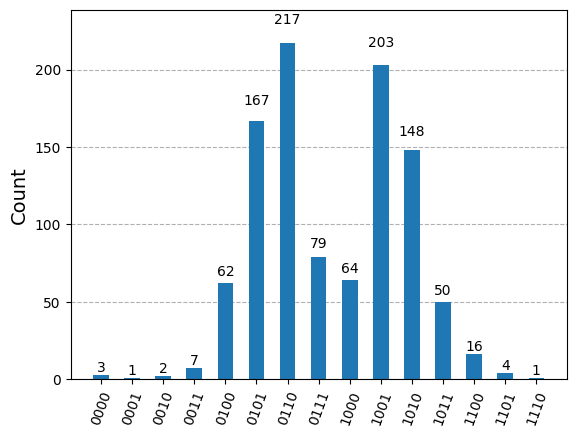

In [4]:
# dv_to_cv = state_transfer.dv2cv_st_non_abelian(0.29,4,cutoff)
# cv_to_dv = dv_to_cv.dag()

cv_to_dv = np.load("Ust1.npy")  ## This is to directly apply the combined unitary



def apply_basis_transformation(circuit, qbr1):
    num_qubits = len(qbr1)
    for i in range(num_qubits):
        circuit.h(qbr1[i])
        if i == num_qubits - 1:  # MSB
            circuit.x(qbr1[i])
            circuit.z(qbr1[i])
        elif i == 0:  # LSB
            circuit.z(qbr1[i])
        else:  # Middle qubits
            circuit.x(qbr1[i])

# Initialize the circuit
qbm = 4
lmbda = 0.29
cutoff = 2**6
qmr = c2qa.QumodeRegister(1, num_qubits_per_qumode=6)
qbr1 = QuantumRegister(4)
cr1 = ClassicalRegister(4)
circuit = c2qa.CVCircuit(qmr, qbr1, cr1)

# Initialize the CV qumode
circuit.cv_initialize(1, qmr[0])
circuit.barrier(label='')

# Add the CV-to-DV transfer gate
for j in range(1,qbm+1):
        V_j = state_transfer.Vj(lmbda,j,4,cutoff)
        gate1 = UnitaryGate(V_j.full(), label=f'V{j}')
        circuit.append(gate1, qmr[:] + qbr1[:])
        
        W_j = state_transfer.Wj(lmbda,j,4,cutoff)
        gate1 = UnitaryGate(W_j.full(), label=f'W{j}')
        circuit.append(gate1, qmr[:] + qbr1[:])


circuit.barrier()

# Apply basis transformation
apply_basis_transformation(circuit, qbr1)

circuit.barrier()

# Simulate and measure
for i in range(len(qbr1)):
    circuit.measure(qbr1[i], cr1[-(i + 1)])

state1, result, _ = c2qa.util.simulate(circuit, shots=1024)
plot_histogram(result.get_counts())

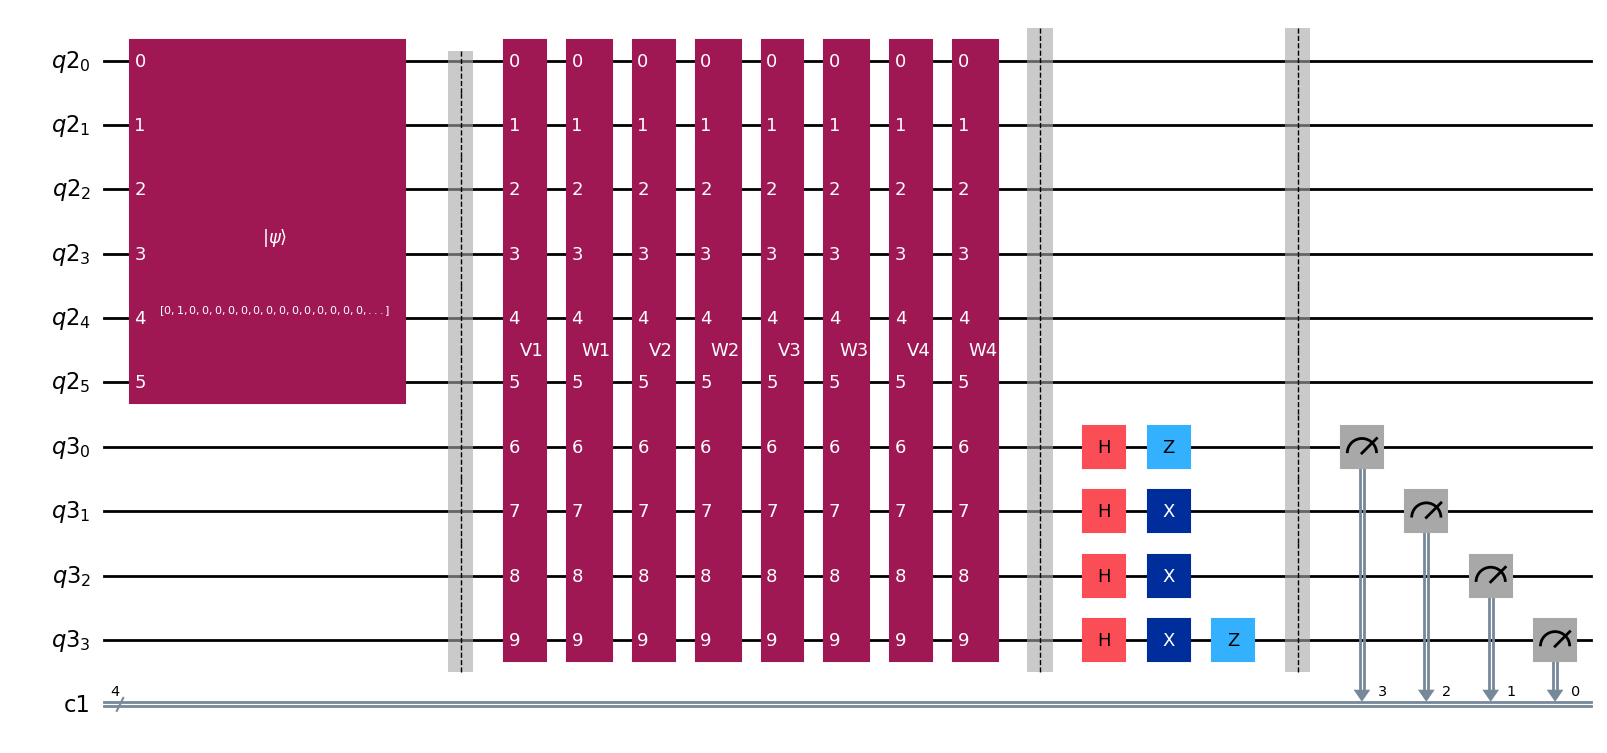

In [5]:
circuit.draw('mpl')

## GKP State

In [10]:
Nmodes=1 
Nqubits = 1 
cutoff = 2**7 
delta = 0.222
N_rounds = 9
alpha = np.sqrt(np.pi) 

a = destroy(cutoff)
x = position(cutoff)
p = momentum(cutoff)

r = -np.log(delta) 

qmr = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_qumode=int(np.ceil(np.log2(cutoff))))

qbr = QuantumRegister(Nqubits)
cbr = ClassicalRegister(Nqubits)

circuit = c2qa.CVCircuit(qmr, qbr,cbr)
circuit.cv_sq(r,qmr[0])

for k in range(1,N_rounds):
    circuit.cv_c_d(alpha,qmr[0],qbr[0])
    Uxk = state_generation.Ux_operator(cutoff,alpha,4*k,delta)
    Ux_gate = UnitaryGate(Uxk.full(), label=f'Ux_{k}')
    circuit.append(Ux_gate, qmr[:] + qbr[:])
    
stateop, result, _ = c2qa.util.simulate(circuit,shots = 1024)

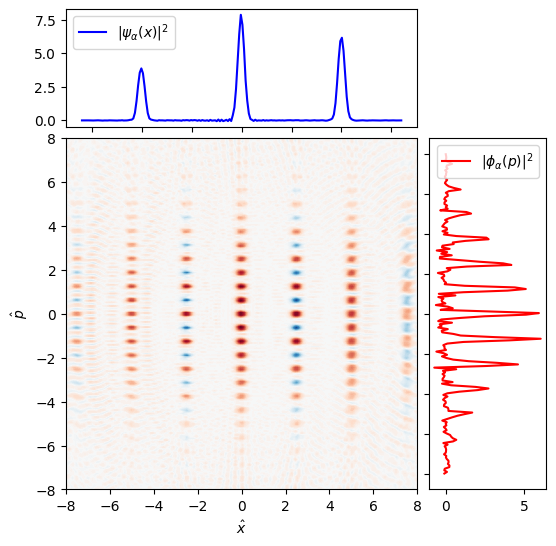

In [11]:
#This cell is mostly plotting
w = c2qa.wigner.wigner(stateop, axes_max= 8, axes_min= -8, axes_steps = 200)
x_dist, y_dist = margins(w.T)

fig = plt.figure(figsize=(6,6))
gs = fig.add_gridspec(2, 2,  width_ratios=(3, 1), height_ratios=(1, 3),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1,0])
ax_x = fig.add_subplot(gs[0,0])
ax_y = fig.add_subplot(gs[1,1])

absmax = max(np.max(w), np.abs(np.min(w)))
color_levels = np.linspace(-absmax, absmax, 100)

#Plot the wigner function of the state in the main panel with a colormap
xaxis = np.linspace(-8, 8, 200)
yaxis = np.linspace(-8, 8, 200)
cont = ax.contourf(xaxis, yaxis, w, color_levels, cmap = "RdBu_r")

#plot the distributions against the (normalized) marginals of the wigner function
ax_x.plot(xaxis, x_dist,  label = r"$|\psi_\alpha(x)|^2$", c= "b")

ax_y.plot(y_dist.T, yaxis, label = r"$|\phi_\alpha(p)|^2$", c = "r")

ax.set(xlabel=r"$\hat x$", ylabel=r"$\hat p$")
ax_x.legend()
ax_y.legend()
ax_x.set_xticklabels([]);
ax_y.set_yticklabels([]);

## Some Custom Gates

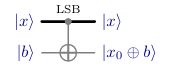

In [12]:
### Extract Qumode X LSB

cutoff = 2**6
qmr1 = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_qumode=int(np.ceil(np.log2(cutoff))),name = 'qumode')
qbr = QuantumRegister(1)
cr = ClassicalRegister(1)

circuit = c2qa.CVCircuit(qmr1,qbr,cr)
circuit.x(qbr[0])
circuit.cv_sq(-np.log(0.202),qmr1[0])  # qumode 0 in squeezed vaccum at x=0

Q_displace = shors.Q_displacement_plus1(cutoff)
gate1 =UnitaryGate(Q_displace.full(), label='Q+1')
circuit.append(gate1, qmr1[0])  # qumode 0 in squeezed vaccum at x=1

circuit.barrier()

LSB_extract = shors.extractLSB(cutoff)
gate1 =UnitaryGate(LSB_extract.full(), label='LSB')
circuit.append(gate1, qmr1[0]+qbr[:])

circuit.measure(qbr[0],cr)

stateop, result, _ = c2qa.util.simulate(circuit,shots = 128)

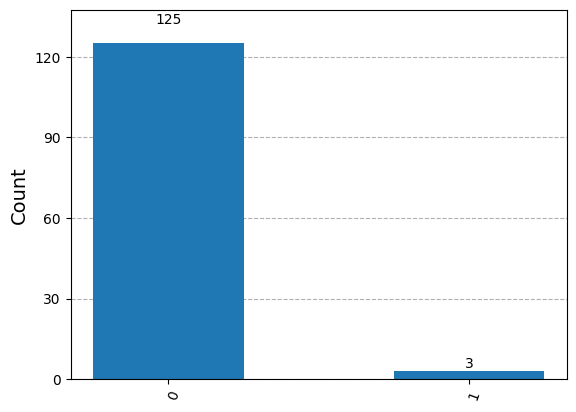

In [13]:
plot_histogram(result.get_counts())

In [14]:
## Multiply Qumode X by alpha

circuit = c2qa.CVCircuit(qmr1,qbr,cr)
circuit.cv_sq(-np.log(0.202),qmr1[0])  # qumode 0 in squeezed vaccum at x=0

Malpha = shors.multiplication(cutoff,2)
Q_displace = shors.Q_displacement_plus1(cutoff)
gate1 =UnitaryGate(Q_displace.full(), label='Q+1')
circuit.append(gate1, qmr1[0])
circuit.append(gate1, qmr1[0])  # qumode 0 in squeezed vaccum at x=2

gate2 =UnitaryGate(Malpha.full(), label='M2')
circuit.append(gate2, qmr1[0])  # qumode 0 in squeezed vaccum at x=4

circuit.barrier()

# circuit.measure(qmr1[0],cr)
stateop, result, _ = c2qa.util.simulate(circuit,shots = 1024)

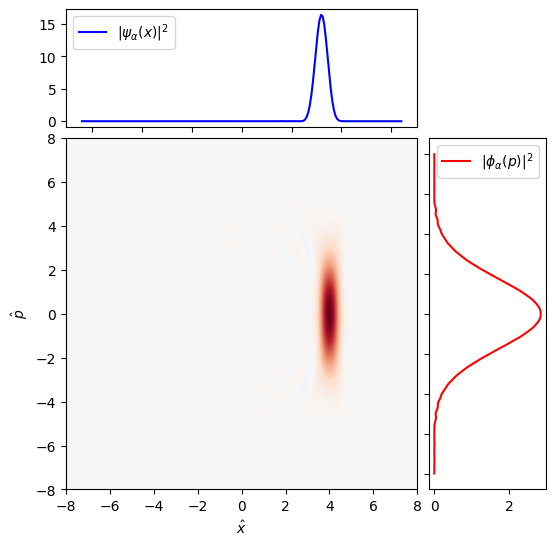

In [15]:
w = c2qa.wigner.wigner(stateop, axes_max= 8, axes_min= -8, axes_steps = 200)
x_dist, y_dist = margins(w.T)

fig = plt.figure(figsize=(6,6))
gs = fig.add_gridspec(2, 2,  width_ratios=(3, 1), height_ratios=(1, 3),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1,0])
ax_x = fig.add_subplot(gs[0,0])
ax_y = fig.add_subplot(gs[1,1])

absmax = max(np.max(w), np.abs(np.min(w)))
color_levels = np.linspace(-absmax, absmax, 100)

#Plot the wigner function of the state in the main panel with a colormap
xaxis = np.linspace(-8, 8, 200)
yaxis = np.linspace(-8, 8, 200)
cont = ax.contourf(xaxis, yaxis, w, color_levels, cmap = "RdBu_r")

#plot the distributions against the (normalized) marginals of the wigner function
ax_x.plot(xaxis, x_dist,  label = r"$|\psi_\alpha(x)|^2$", c= "b")

ax_y.plot(y_dist.T, yaxis, label = r"$|\phi_\alpha(p)|^2$", c = "r")

ax.set(xlabel=r"$\hat x$", ylabel=r"$\hat p$")
ax_x.legend()
ax_y.legend()
ax_x.set_xticklabels([]);
ax_y.set_yticklabels([]);